In [1]:
# For interactive plots use: 
%plot gnuplot 

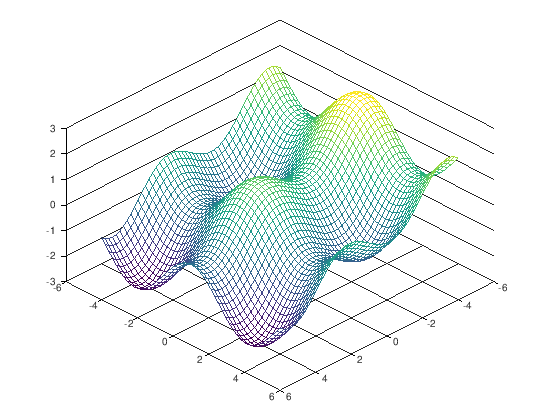

In [8]:
resolution = 50;
xDimension = linspace(-5,5,resolution);
yDimension = linspace(-5,5,resolution);
zSurface = ( sin(xDimension)-sin(xDimension/2)+cos(yDimension)' );
mesh(xDimension, yDimension, zSurface);
view(135, 45);

In [3]:
function [x, y] = lineSearchInOneDirection(xIndex,yIndex,zSpace, stepSize)
    % https://en.wikipedia.org/wiki/Line_search
    % For it to be coordinate descent, do one at a time
    lowestXIndex = xIndex;
    lowestYIndex = yIndex;
    lowestZ = zSpace(xIndex,yIndex);
    for ii =[-1,0,1]
        for jj =[-1,0,1]
            % we want to ensure the direction is x XOR y
            if ~((ii==0 && jj~=0) || (ii~=0 && jj==0))
                continue;
            end
            potentialXIndex = xIndex+ii;
            potentialYIndex = yIndex+jj;

            % Ignore attempts to get values that are out of bounds
            if potentialXIndex < 1 || potentialXIndex > size(zSpace,1) || potentialYIndex < 1 || potentialYIndex > size(zSpace,1)
                continue;
            end
            potentialZ = zSpace(potentialXIndex, potentialYIndex); 

            % What happens if both are equal? We should make it a coin flip from the two equal lowestZ
            if potentialZ < lowestZ 
                lowestXIndex = potentialXIndex;
                lowestYIndex = potentialYIndex;
                lowestZ = potentialZ;
            end
        end
    end
    x = stepSize*(lowestXIndex-xIndex);
    y = stepSize*(lowestYIndex-yIndex);
end

In [4]:
function [xIndex,yIndex,z] = getNextPos(xIndex, yIndex, zSurface, xChange, yChange)
    xIndex = xIndex + xChange;
    yIndex = yIndex + yChange;
    z = zSurface(xIndex,yIndex);
end

In [5]:
stepCount = 1;
xIndex = 25;
yIndex = 30;
z = zSurface(xIndex,yIndex);
zBuffer = 0.1;
pathX = [xDimension(xIndex)];
pathY = [yDimension(yIndex)];
pathZ = [(z+zBuffer)];


lastPos = [xIndex,yIndex,z];

In [6]:
finished = 0;
while ~finished
    stepSize = ceil(resolution/(stepCount*6));
    [xChange, yChange] = lineSearchInOneDirection(xIndex, yIndex, zSurface, stepSize);
    [xIndex,yIndex,z] = getNextPos(xIndex, yIndex, zSurface, xChange, yChange);
    if [xIndex, yIndex, z] == lastPos
        finished = 1;
    end
    lastPos = [xIndex, yIndex, z];
    pathX = [pathX xDimension(xIndex)];
    pathY = [pathY yDimension(yIndex)];
    pathZ = [pathZ (z+zBuffer)];
    stepCount = stepCount + 1;
end

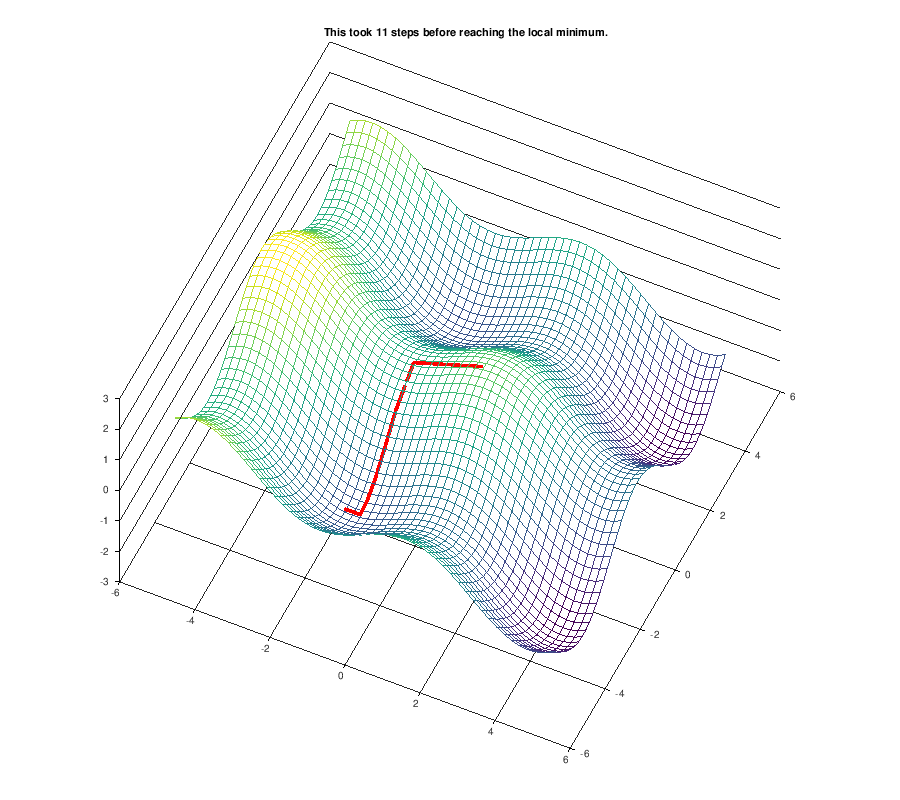

In [9]:
figure("Position", [0 0 900 800])
mesh(xDimension, yDimension, zSurface);
view(25, 65);
hold on;
plot3(pathY,pathX,pathZ, '-r', 'LineWidth', 10.0);
title(sprintf("This took %d steps before reaching the local minimum.\n", stepCount));
hold off